In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [ ]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [ ]:
a=df['Employment.Type'].mode()
a

0    Self employed
dtype: object

In [ ]:
df['Employment.Type'].fillna('Self employed',inplace=True)

In [ ]:
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [ ]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])

In [ ]:
df['Age'] = pd.to_datetime('now') - df['Date.of.Birth']

In [ ]:
df['Age'] = df['Age'] /  np.timedelta64(1, 'Y')

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.604985
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1,35.025212
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.959503
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1,26.608886
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42.907647


In [ ]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])

df['Loan_Taking_Year'] = pd.to_datetime('now') - df['DisbursalDate']

df['Loan_Taking_Year'] = df['Loan_Taking_Year'] /  np.timedelta64(1, 'Y')

df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,Loan_Taking_Year
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.604985,2.422216
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1,35.025212,1.869159
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.959503,2.583752
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1,26.608886,1.787021
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42.907647,1.869159


In [ ]:
df=df.drop(['Date.of.Birth','DisbursalDate'],axis=1)

In [ ]:
df=df.drop(['UniqueID'],axis=1)

In [ ]:
df=df.drop(['Current_pincode_ID','supplier_id','branch_id','manufacturer_id','State_ID','Employee_code_ID'],axis=1)

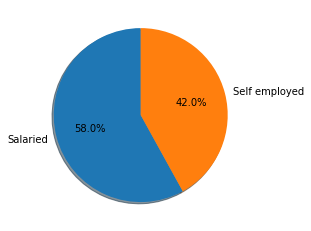

In [ ]:
labels = ["Salaried","Self employed"]
values=df['Employment.Type'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

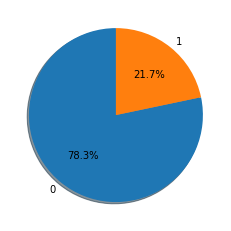

In [ ]:
labels = ["0","1"]
values=df['loan_default'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,1.332000e+04,47145.000000,53803.000000,60413.000000,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,3.700000e+04,65717.000000,70946.000000,79201.750000,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,1.003000e+01,68.880000,76.800000,83.670000,9.500000e+01
MobileNo_Avl_Flag,233154.0,1.000000,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.000000e+00,0.000000,0.000000,678.000000,8.900000e+02


In [ ]:
cat=df.select_dtypes(exclude=['int32','int64','float64'])
num=df.select_dtypes(include=['int32','int64','float64'])
cat

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION
0,Salaried,No Bureau History Available
1,Self employed,I-Medium Risk
2,Self employed,No Bureau History Available
3,Self employed,L-Very High Risk
4,Self employed,No Bureau History Available
...,...,...
233149,Salaried,D-Very Low Risk
233150,Self employed,A-Very Low Risk
233151,Salaried,No Bureau History Available
233152,Salaried,No Bureau History Available


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=cat.apply(LabelEncoder().fit_transform)
cat.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION
0,0,13
1,1,8
2,1,13
3,1,11
4,1,13


In [ ]:
df=pd.concat([cat,num],axis=1)
df.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,Loan_Taking_Year
0,0,13,50578,58400,89.55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.604985,2.422216
1,1,8,47145,65550,73.23,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1,35.025212,1.869159
2,1,13,53278,61360,89.63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.959503,2.583752
3,1,11,57513,66113,88.48,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1,26.608886,1.787021
4,1,13,52378,60300,88.39,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42.907647,1.869159


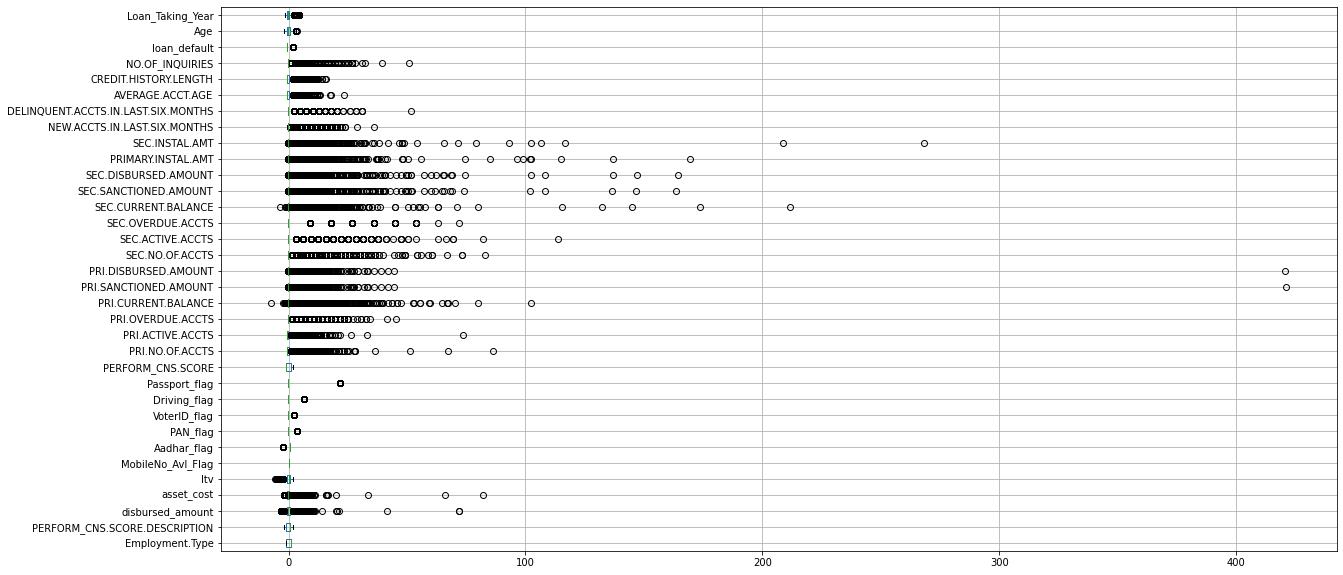

In [ ]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)

z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(20,10))

In [ ]:
X=df.drop(['loan_default'],axis=1)
y=df['loan_default']
X.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Loan_Taking_Year
0,0,13,50578,58400,89.55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.604985,2.422216
1,1,8,47145,65550,73.23,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,35.025212,1.869159
2,1,13,53278,61360,89.63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.959503,2.583752
3,1,11,57513,66113,88.48,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,26.608886,1.787021
4,1,13,52378,60300,88.39,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,42.907647,1.869159


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.00662095 0.01775921 0.13768589 0.13722656 0.14526297 0.
 0.00302723 0.00445258 0.00318133 0.00187559 0.00041142 0.02801441
 0.02415898 0.01753534 0.00868815 0.02621002 0.02580629 0.02598353
 0.00318432 0.00155234 0.00100505 0.00142468 0.00151658 0.00149278
 0.02913564 0.0016373  0.01375503 0.00857966 0.01881013 0.0223038
 0.0202748  0.13785188 0.12357558]


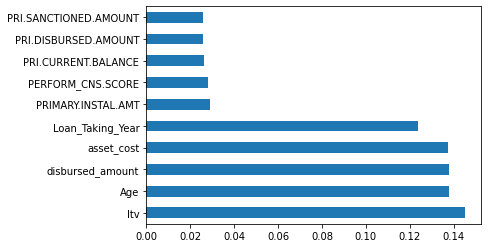

In [ ]:
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#X=X.drop(["Employment.Type",	"PERFORM_CNS.SCORE.DESCRIPTION","PRI.CURRENT.BALANCE","PERFORM_CNS.SCORE","PRIMARY.INSTAL.AMT",	"MobileNo_Avl_Flag",	"Aadhar_flag",	"PAN_flag",	"VoterID_flag",	"Driving_flag",	"Passport_flag",	"PRI.NO.OF.ACCTS",	"PRI.ACTIVE.ACCTS",	"PRI.OVERDUE.ACCTS",	"PRI.SANCTIONED.AMOUNT",	"PRI.DISBURSED.AMOUNT",	"SEC.NO.OF.ACCTS",	"SEC.ACTIVE.ACCTS",	"SEC.OVERDUE.ACCTS",	"SEC.CURRENT.BALANCE",	"SEC.SANCTIONED.AMOUNT",	"SEC.DISBURSED.AMOUNT",	"SEC.INSTAL.AMT",	"NEW.ACCTS.IN.LAST.SIX.MONTHS",	"DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS",	"NO.OF_INQUIRIES"],axis=1)

In [ ]:
X.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Loan_Taking_Year
0,0,13,50578,58400,89.55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.604985,2.422216
1,1,8,47145,65550,73.23,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,35.025212,1.869159
2,1,13,53278,61360,89.63,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.959503,2.583752
3,1,11,57513,66113,88.48,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,26.608886,1.787021
4,1,13,52378,60300,88.39,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,42.907647,1.869159


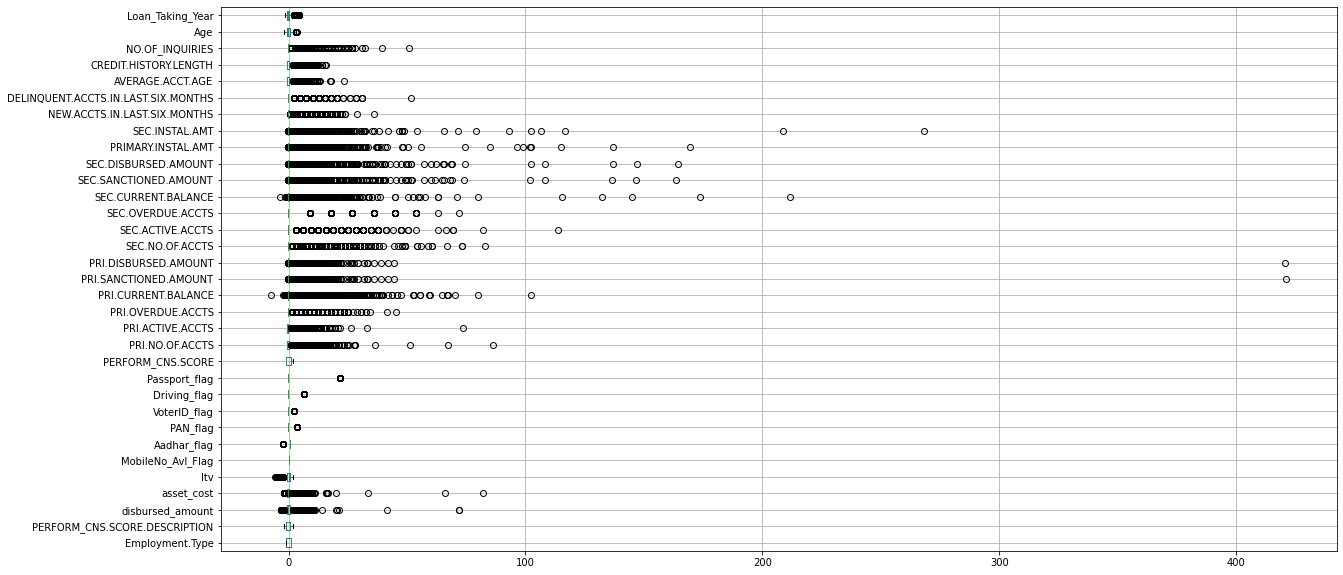

In [ ]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)

z=pd.DataFrame(scaler.transform(X),columns=X.columns)
z.boxplot(vert=False,figsize=(20,10))

In [ ]:
Q1 = X["disbursed_amount"].quantile(0.25)
Q3 = X["disbursed_amount"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
X["disbursed_amount"] = np.where(X["disbursed_amount"] >= (Q3 + 1.5 * IQR), Q3, X["disbursed_amount"])
X["disbursed_amount"] = np.where(X["disbursed_amount"] <= (Q1 - 1.5 * IQR), Q1, X["disbursed_amount"])

13268.0


In [ ]:
Q1 = X["asset_cost"].quantile(0.25)
Q3 = X["asset_cost"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
X["asset_cost"] = np.where(X["asset_cost"] >= (Q3 + 1.5 * IQR), Q3, X["asset_cost"])
X["asset_cost"] = np.where(X["asset_cost"] <= (Q1 - 1.5 * IQR), Q1, X["asset_cost"])

13484.75


In [ ]:
Q1 = X["ltv"].quantile(0.25)
Q3 = X["ltv"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
X["ltv"] = np.where(X["ltv"] >= (Q3 + 1.5 * IQR), Q3, X["ltv"])
X["ltv"] = np.where(X["ltv"] <= (Q1 - 1.5 * IQR), Q1, X["ltv"])

14.790000000000006


In [ ]:
Q1 = X["Age"].quantile(0.25)
Q3 = X["Age"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
X["Age"] = np.where(X["Age"] >= (Q3 + 1.5 * IQR), Q3, X["Age"])
X["Age"] = np.where(X["Age"] <= (Q1 - 1.5 * IQR), Q1, X["Age"])

15.107770864562593


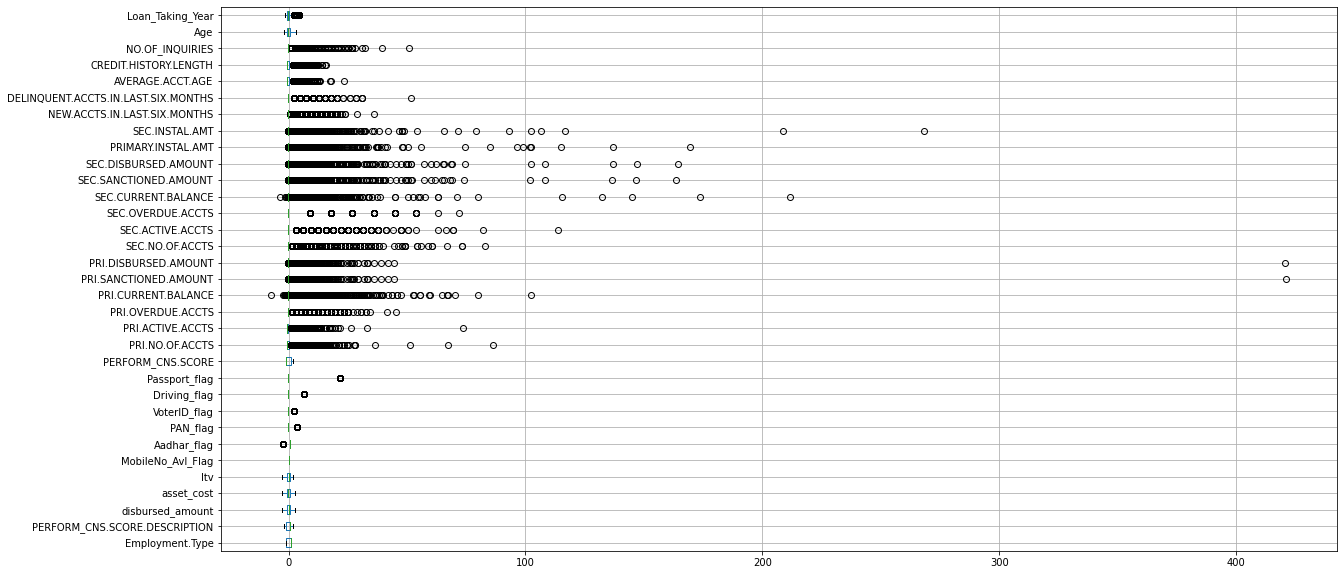

In [ ]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)

z=pd.DataFrame(scaler.transform(X),columns=X.columns)
z.boxplot(vert=False,figsize=(20,10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(x_test)
print(x_test.shape)

(46631, 33)


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
print(y_test.shape)    

(46631,)


In [ ]:
#model=RandomForestClassifier(n_estimators=200,criterion="entropy")
#model.fit(X_train,y_train)
#y_pred=model.predict(x_test)


In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#DTREE = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#DTREE.fit(X_train, y_train)
#y_pred=DTREE.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[36550    64]
 [ 9976    41]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 78.46925864768073


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics

In [ ]:
model1=Sequential()
model1.add(Dense(44,kernel_initializer='glorot_uniform',activation='relu',input_dim=33))

model1.add(Dense(44,kernel_initializer='glorot_uniform',activation='relu'))

model1.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
model1.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(X_train,y_train, batch_size=100,epochs=1000)

Epoch 1/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5122 - accuracy: 0.7800
Epoch 2/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5061 - accuracy: 0.7824
Epoch 3/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5046 - accuracy: 0.7825
Epoch 4/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5040 - accuracy: 0.7826
Epoch 5/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5036 - accuracy: 0.7827
Epoch 6/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5030 - accuracy: 0.7826
Epoch 7/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5028 - accuracy: 0.7827
Epoch 8/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5026 - accuracy: 0.7827
Epoch 9/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.5021 - accuracy: 0.7831
Epoch 10/1000
1866/1866 [==============================] - 2s 1m

In [ ]:
y_pred=model1.predict(x_test,verbose=0)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
cm

array([[35638,   976],
       [ 9536,   481]])

In [ ]:

from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
print("Accuracy",a*100)

Accuracy 77.45705646458364
